In [39]:
from lifelines.datasets import load_waltons
surv = load_waltons()
import matplotlib as plt
from lifelines.plotting import plot_lifetimes
from numpy.random import uniform, exponential
import numpy as np 

#### Understand the data

In [16]:
print(surv['group'].unique())
print(surv['T'].unique())
print(surv['E'].unique())
surv.head()

['miR-137' 'control']
[ 6. 13. 19. 26. 33. 47. 62.  9. 15. 22. 29. 36. 43. 54. 61. 69. 32. 53.
 60. 68. 75. 17. 51. 58. 66.  7. 41. 48. 56. 63. 38. 45.]
[1 0]


,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


In [8]:
T =  surv['T']
E = surv['E']

In [9]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

In [11]:
%matplotlib inline

#### Plot Survival Curve

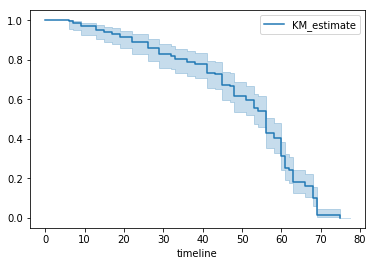

In [12]:
kmf.survival_function_
kmf.median_
kmf.plot()

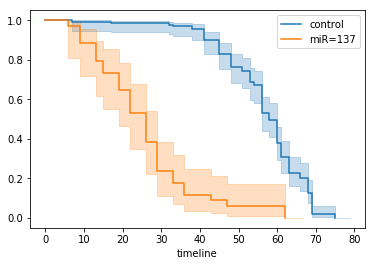

In [13]:
groups = surv['group']
ix =  (groups =='miR-137')

kmf.fit(T[~ix], E[~ix], label = 'control')
ax = kmf.plot()
kmf.fit(T[ix],E[ix],label = 'miR=137')
kmf.plot(ax=ax)

### Aalen Fitter

In [17]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 163 observations, 7 censored>

#### Now, using Rossi dataset

In [18]:
from lifelines.datasets import load_rossi
new_surv=load_rossi()
new_surv.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


### Cox Proportional-Hazard

In [19]:
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest', show_progress=True)

cph.print_summary()

Iteration 1: norm_delta = 0.48337, step_size = 0.95000, ll = -675.38063, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13160, step_size = 0.95000, ll = -659.79004, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.01712, step_size = 0.95000, ll = -658.76197, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00103, step_size = 0.95000, ll = -658.74771, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00005, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Convergence completed after 6 iterations.
n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3794     0.6843    0.1914 -1.9826 0.0474     -0.7545     -0.0043   *
age  -0.0574     0.9442    0.0220 -2.6109 0.0090     -0.1006     -0.0143  **
race  0.3139     1.3688    0.3080  1.0192 0.3081     -0.2898      0.9176    
wexp -0.1498     0.8609    

In [23]:
print(cph.score_)
print(cph.hazards_)
print(cph.baseline_hazard_.head())

0.6403292470997135
           fin       age    race      wexp       mar      paro      prio
coef -0.379422 -0.057438  0.3139 -0.149796 -0.433704 -0.084871  0.091497
          baseline hazard
event_at                 
0.0              0.000000
1.0              0.001958
2.0              0.001964
3.0              0.001965
4.0              0.001969


#### Now, predict

In [25]:
X = rossi_dataset.drop(["week", "arrest"], axis=1)
cph.predict_partial_hazard(X)
cph.predict_survival_function(X).head()

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
event_at,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.997616,0.993695,0.994083,0.999045,0.997626,0.997578,0.998865,0.997827,0.995453,0.997462,...,0.997826,0.996005,0.996031,0.997774,0.998892,0.999184,0.997033,0.998866,0.998170,0.998610
2.0,0.995230,0.987411,0.988183,0.998089,0.995250,0.995154,0.997728,0.995653,0.990914,0.994922,...,0.995649,0.992014,0.992067,0.995547,0.997782,0.998366,0.994065,0.997730,0.996337,0.997217
3.0,0.992848,0.981162,0.982314,0.997133,0.992878,0.992734,0.996592,0.993482,0.986392,0.992388,...,0.993476,0.988037,0.988115,0.993324,0.996673,0.997548,0.991105,0.996595,0.994507,0.995826
4.0,0.990468,0.974941,0.976468,0.996176,0.990507,0.990316,0.995455,0.991311,0.981882,0.989855,...,0.991304,0.984067,0.984171,0.991100,0.995563,0.996729,0.988147,0.995458,0.992676,0.994433


#### Show Cox Coefficients

Iteration 1: norm_delta = 0.48337, step_size = 0.95000, ll = -675.38063, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13160, step_size = 0.95000, ll = -659.79004, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.01712, step_size = 0.95000, ll = -658.76197, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00103, step_size = 0.95000, ll = -658.74771, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00005, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00000, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.1
Convergence completed after 6 iterations.


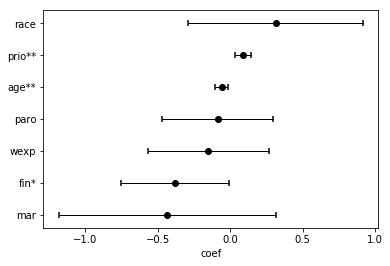

In [26]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest', show_progress=True)

cph.plot()